In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('C:\\Users\\Gaura\\OneDrive\\Desktop\\chest_xray\\train')
test = get_training_data('C:\\Users\\Gaura\\OneDrive\\Desktop\\chest_xray\\test')
val = get_training_data('C:\\Users\\Gaura\\OneDrive\\Desktop\\chest_xray\\val')

C:\Users\Gaura\AppData\Local\Temp\ipykernel_12264\771166761.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
train

array([[array([[18, 28, 29, ..., 13,  7,  1],
               [21, 24, 29, ..., 14,  9,  3],
               [22, 26, 32, ..., 16,  9,  2],
               ...,
               [10,  9,  8, ..., 15, 15, 15],
               [10, 10,  8, ..., 15, 15, 15],
               [10, 10,  8, ..., 15, 15, 15]], dtype=uint8), 0],
       [array([[61, 70, 76, ..., 28, 25, 22],
               [75, 81, 80, ..., 28, 24, 23],
               [86, 83, 85, ..., 31, 23, 21],
               ...,
               [ 0,  0,  0, ...,  0,  0,  0],
               [ 0,  0,  0, ...,  0,  0,  0],
               [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0],
       [array([[ 22,  33,  29, ...,  86, 101, 118],
               [ 27,  35,  33, ..., 116, 121, 115],
               [ 31,  35,  27, ..., 121, 103, 101],
               ...,
               [  0,   0,   0, ...,   0,   0,   0],
               [  0,   0,   0, ...,   0,   0,   0],
               [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0],
       ...,
       

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


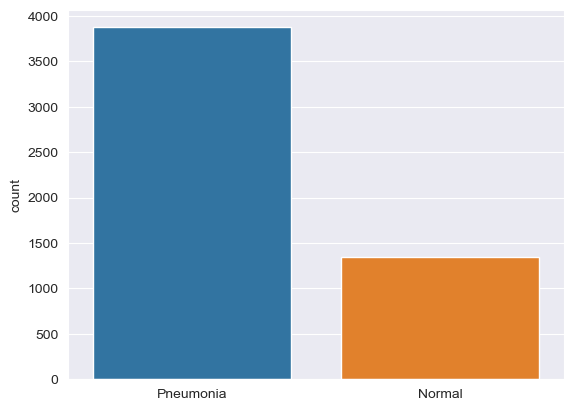

In [5]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 
plt.show()

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


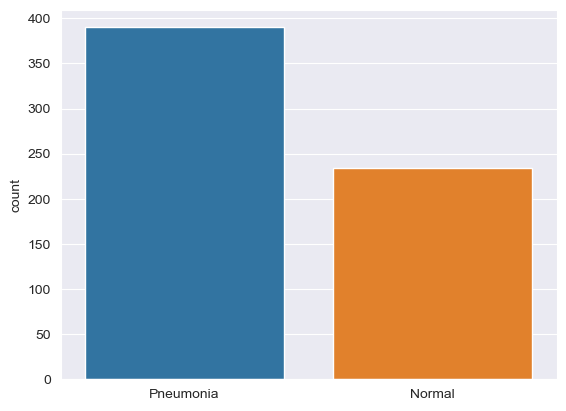

In [6]:
le = []
for i in test:
    if(i[1] == 0):
        le.append("Pneumonia")
    else:
        le.append("Normal")
sns.set_style('darkgrid')
sns.countplot(le) 
plt.show()

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


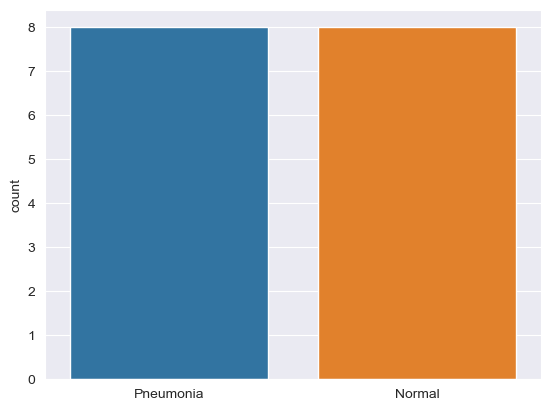

In [7]:
v = []
for i in val:
    if(i[1] == 0):
        v.append("Pneumonia")
    else:
        v.append("Normal")
sns.set_style('darkgrid')
sns.countplot(v) 
plt.show()

1. In our data set we have total 3 folders they are (test,train,val) each containing the chest x-ray.
2. test folder contains both Pneumonic and Non-Pneumonic images and they are in total 5800(approximately)
3. and the train data also contain both Pneumonic and Non-Pneumonic images and they are in total 650(approximately)

# Displaying the Pnemonic and Normal Images

Text(0.5, 1.0, 'NORMAL')

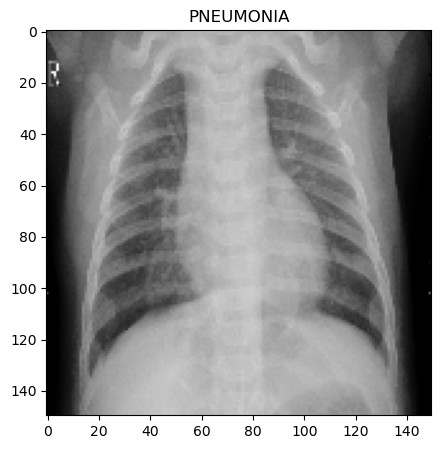

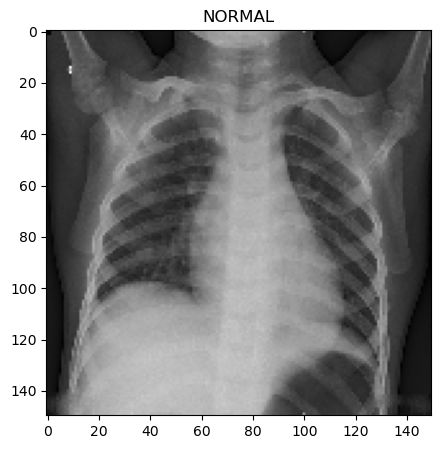

In [4]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0],cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0],cmap='gray')
plt.title(labels[train[-1][1]])

# Processing the data:

In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []
#here the features are the matrics i.e (coz the images are stored in the form of matrix)
#and the lables are the 0 and 1 0=Normal data 1=Pnemonia data
# it is just like the Normal CSV file where x_train is the input i.e independent variable and the output variable is lables
# that we have assigned 
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [6]:
# Normalize the data
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

In [7]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [8]:
x_train.shape

(5216, 150, 150, 1)

In [16]:
# before giving it to the CNN model we have to re-size the image in the shape of 150 that we have specified while taking input
# we have specified that the input size of the image will be of 150 pixels

In [9]:
gen=ImageDataGenerator(
                        rescale=1/255,
                        shear_range=0.2,     # if some images are slanted then this will be rotated 20deg
                        zoom_range=0.2,      # if some of the images are shrinked then this is going to zoom it by 20%
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                        horizontal_flip = True)

In [10]:
gen.fit(x_train)

# building the CNN model:

In [11]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization, Dropout 

In [12]:
from keras.layers import Conv2D
classifier=Sequential()
#Input Convolution layer
classifier.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',input_shape=[150,150,1])) 
classifier.add(BatchNormalization())
#building our first layer
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the second convolution layer
classifier.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the third convolution layer
classifier.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the forth convolution layer
classifier.add(Conv2D(filters=128,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the fifth convolution layer
classifier.add(Conv2D(filters=256,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

classifier.add(Flatten()) #flattening the image before we fit the data

#adding the Dense layer to the neurons
from keras.layers import Dense
classifier.add(Dense(units=128,activation='relu')) #hidden layer with the 128 Neuron
classifier.add(Dense(units=1,activation='sigmoid')) #output layer with one neuron
#classifier.add(Dense(units=2,activation='softmax')) #output layer with one neuron

In [13]:
#compilation of the model
classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# 1.here the optimizer that we can use is ADAMS which can be used instead of stocastic gradient descent .
# where the error is constantly minimized .
# 2.rmsprop :- is Root mean squared propogation 1)it simply changes the learning rate slowly
                                               #2)and allows the learning rate to adapt overtime
# 3. and as it was the binary problem i.e we had to identify between the Pnumonic and Normal x-ray we have used binary_crossentropy

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3,
                                            min_lr=0.000001)

In [ ]:
classifier.fit(gen.flow(x_train,y_train,batch_size=32),
                          epochs=20,
                          validation_data=gen.flow(x_val,y_val),
                        callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 85s 502ms/step - loss: 0.4828 - accuracy: 0.8558 - val_loss: 27.9714 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 76s 462ms/step - loss: 0.2186 - accuracy: 0.9193 - val_loss: 45.6508 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.2097 - accuracy: 0.9235
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 77s 471ms/step - loss: 0.2097 - accuracy: 0.9235 - val_loss: 21.1056 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 86s 524ms/step - loss: 0.1182 - accuracy: 0.9586 - val_loss: 9.8899 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/20
163/163 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9636
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [===================

# printing the model Accuracy

In [22]:
print("Loss that occured in our Model is:",classifier.evaluate(x_test,y_test)[0])
print('Accuracy thay we have obtained:',classifier.evaluate(x_test,y_test)[1],'%')

20/20 [==============================] - 3s 120ms/step - loss: 206.9776 - accuracy: 0.8381
Loss that occured in our Model is: 206.9776153564453
20/20 [==============================] - 3s 135ms/step - loss: 206.9776 - accuracy: 0.8381
Accuracy thay we have obtained: 0.8381410241127014 %


In [97]:
#Model Prediction

In [23]:
predictions = classifier.predict(x_test)
#print(predictions[:10])
for i in range(len(predictions)):
    predictions[i]=1 if predictions[i]>0.5 else 0
    #print(predictions[i])

20/20 [==============================] - 3s 126ms/step


In [24]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.84      0.92      0.88       390
   Normal (Class 1)       0.84      0.71      0.77       234

           accuracy                           0.84       624
          macro avg       0.84      0.81      0.82       624
       weighted avg       0.84      0.84      0.83       624



In [25]:
cm = confusion_matrix(y_test,predictions)
cm

array([[358,  32],
       [ 69, 165]], dtype=int64)

In [186]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
cm

,0,1
0,390,0
1,234,0


<AxesSubplot:>

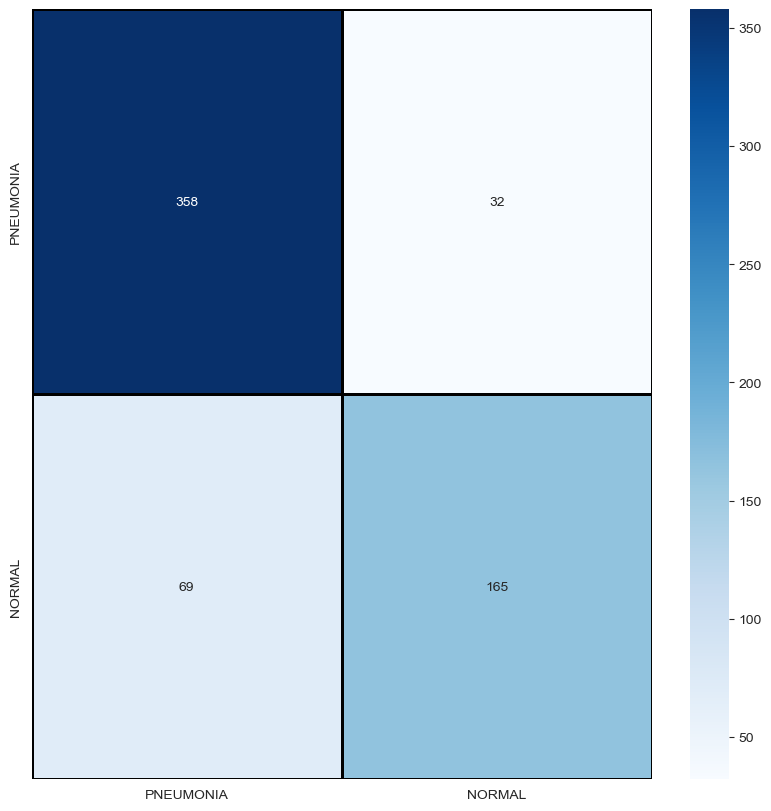

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [2]:
import numpy as np
from PIL import Image

In [3]:
test_image=Image.open('C:\\Users\\Gaura\\OneDrive\\Desktop\\chest_xray\\val\\PNEUMONIA\\person1946_bacteria_4874.jpeg')
test_image=test_image.resize((150,150))
test_image=np.array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
if result[[0]]==0:
    print('Pneumonic')
else:
    print('Normal')

NameError: name 'classifier' is not defined

In [177]:
test_image=Image.open('C:\\Users\\Gaura\\OneDrive\\Desktop\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1442-0001.jpeg')
test_image=test_image.resize((150,150))
test_image=np.array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
print(result)
if result[[0]]==0:
    print('Pneumonic')
else:
    print('Normal')

1/1 [==============================] - 0s 21ms/step
[[0.]]
Pneumonic
